# Autoencoder for Images

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


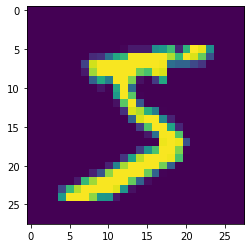

In [4]:
plt.imshow(X_train[0])

In [5]:
#Scale our dataset
X_train = X_train/255
X_test = X_test/255

## Basic autoencoder

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [7]:
X_train[0].shape

(28, 28)

In [8]:
#we know that we have 784 pixels
28*28

784

In [9]:
784/2

392.0

In [10]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [11]:
25/784 #3 % on the size

0.03188775510204082

In [12]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [13]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [15]:
autoencoder.fit(X_train, X_train, epochs=5,validation_data=(X_test, X_test))

Epoch 1/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1866 - accuracy: 0.1588 - val_loss: 0.1713 - val_accuracy: 0.1718
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1623 - accuracy: 0.1923 - val_loss: 0.1533 - val_accuracy: 0.2025
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1495 - accuracy: 0.2117 - val_loss: 0.1464 - val_accuracy: 0.2166
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1425 - accuracy: 0.2233 - val_loss: 0.1428 - val_accuracy: 0.2242
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1382 - accuracy: 0.2307 - val_loss: 0.1340 - val_accuracy: 0.2288


In [16]:
passed_images = autoencoder.predict(X_test[:10])

ORIGINAL IMAGE


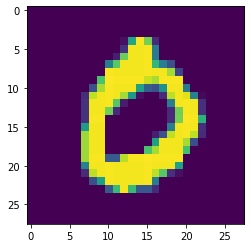

ATTEMPTED RECONSTRUCTION


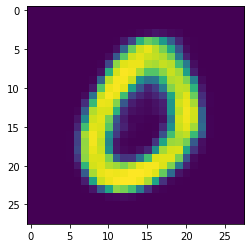

In [20]:
n = 3
print("ORIGINAL IMAGE")
plt.imshow(X_test[n])
plt.show()
print("ATTEMPTED RECONSTRUCTION")
plt.imshow(passed_images[n])

##  AutoEncoders for Denoising Images

In [21]:
from tensorflow.keras.layers import GaussianNoise

In [22]:
sample = GaussianNoise(0.2)

In [23]:
sample

In [24]:
noisey = sample(X_test[:10],training=True)

ORIGINAL


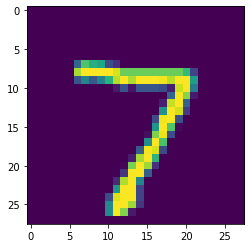

NOISEY VERSION


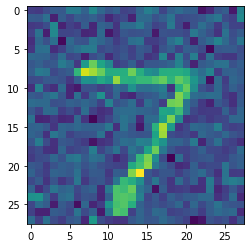

In [25]:
n = 0
print("ORIGINAL")
plt.imshow(X_test[n])
plt.show()
print("NOISEY VERSION")
plt.imshow(noisey[n])
plt.show()

##  Create  noise removal autoencoder and train it.

In [26]:
import tensorflow as tf

In [27]:
tf.random.set_seed(101)
np.random.seed(101)
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))


encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))


In [28]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [32]:
noise_remover.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

In [34]:
noise_remover.fit(X_train, X_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1297 - accuracy: 0.2319
Epoch 2/8
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1212 - accuracy: 0.2440
Epoch 3/8
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1164 - accuracy: 0.2523
Epoch 4/8
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1120 - accuracy: 0.2599
Epoch 5/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1094 - accuracy: 0.2669
Epoch 6/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1077 - accuracy: 0.2696
Epoch 7/8
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1064 - accuracy: 0.2723
Epoch 8/8
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1050 - accuracy: 0.2741


In [35]:
ten_noisey_images = sample(X_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


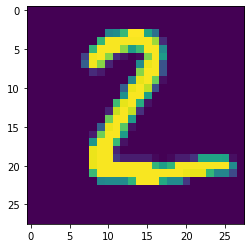

The Noisey Version


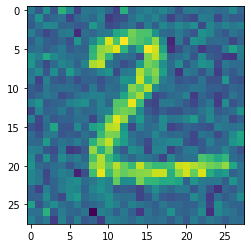

After going through denoiser


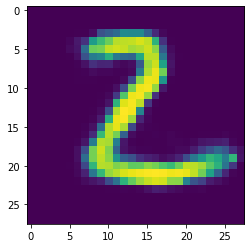

In [36]:
n = 1
print("The Original")
plt.imshow(X_test[n])
plt.show()
print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()